# build dataset

In [1]:
import seismic_dataset_builder  
(X_train, y_train, v_train), (X_test, y_test, v_test), values, labels = seismic_dataset_builder.create_bp_synth()

# build and train calssification CNN

In [2]:
import seismic_ml_kernel
classification_model = seismic_ml_kernel.ci_multi_train_classification (X_train, y_train, 30)

Using TensorFlow backend.


Model already exists


# test classification dataset

In [3]:
seismic_ml_kernel.ci_multi_test_classification (classification_model, X_test, y_test)

3422/3422 [==============================] - 143s   
[0.50053574065588013, 0.87288135568835035]


# classification on single image

sample: 975
sample label: BP 0.2, 0.25, 0.3, 0.35
predicted label: BP 0.2, 0.25, 0.3, 0.35
sample category: 1
predicted category: 1
prediction accuracy: 100.0 %


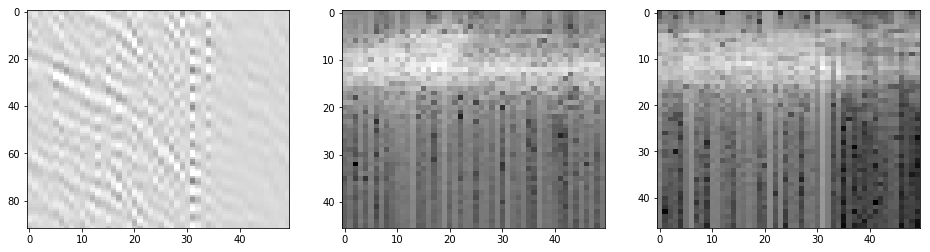

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
    
randidx, correct_y, predicted_y = seismic_ml_kernel.ci_multi_evaluate_random_classification (classification_model, X_test, y_test)

color = 'green'
predicted_cat = predicted_y.argmax() 
if predicted_cat != correct_y:
    color = 'red'

import pandas as pd
table = pd.DataFrame(predicted_y*100).style.apply(seismic_ml_kernel.highlight_max, color=color, axis=None)


print('sample:', randidx)
print('sample label:', labels[y_test[randidx]])
print('predicted label:', labels[predicted_cat])
print('sample category:', y_test[randidx])
print('predicted category:', predicted_cat)
print('prediction accuracy:', predicted_y[predicted_cat]*100, '%')
table

# vision model 1
![title](outputs/vision_model0.png)

# vision model 2
![title](outputs/vision_model1.png)

# vision model 3
![title](outputs/vision_model2.png)

# classification model
![title](outputs/classification_model.png)